In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("Survey.csv")
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127.0
1,Data Analysis / Statistics,1688,444,60.0
2,Data Journalism,429,1081,610.0
3,Data Visualization,1340,734,102.0
4,Deep Learning,1263,770,136.0


# **Pandas**

# Task1

In [52]:
df = df.rename(columns={"Unnamed: 0":"Data Area"})
df = df.fillna(74)
df["Not interested"] = df["Not interested"].astype(int)
df

,Data Area,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


# Task 2

In [53]:
df['Total'] = df.loc[:,'Very interested':'Not interested'].sum(axis = 1)
df

,Data Area,Very interested,Somewhat interested,Not interested,Total
0,Big Data (Spark / Hadoop),1332,729,127,2188
1,Data Analysis / Statistics,1688,444,60,2192
2,Data Journalism,429,1081,610,2120
3,Data Visualization,1340,734,102,2176
4,Deep Learning,1263,770,136,2169
5,Machine Learning,1629,477,74,2180


# Task 3

**Method 1: using list**

In [54]:
vi,si,ni = df[['Very interested','Somewhat interested','Not interested']]
# si = df['Somewhat interested']
# ni = df['Not interested']

vi_per = df['Very interested']/df['Total']*100
vi_per = [round(x, 2) for x in vi_per]
si_per = df['Somewhat interested']/df['Total']*100
si_per = [round(x, 2) for x in si_per]
ni_per = df['Not interested']/df['Total']*100
ni_per = [round(x, 2) for x in ni_per]

new_df = df.drop(df.iloc[:,1:5], axis=1)
new_df['Very interested'] = vi_per
new_df['Somewhat interested'] = si_per
new_df['Not interested'] = ni_per
new_df = new_df.sort_values(by='Very interested', ascending=False)

# print the sorted DataFrame
new_df 

,Data Area,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,77.01,20.26,2.74
5,Machine Learning,74.72,21.88,3.39
3,Data Visualization,61.58,33.73,4.69
0,Big Data (Spark / Hadoop),60.88,33.32,5.80
4,Deep Learning,58.23,35.50,6.27
2,Data Journalism,20.24,50.99,28.77


**Method 2: using Lambda**

In [55]:
df[['Very interested','Somewhat interested','Not interested']] = df[['Very interested','Somewhat interested','Not interested']].apply(lambda x: ((x/df['Total'])*100).astype('float'))
df= df.round(decimals=2).sort_values(by = 'Very interested', ascending = False)
df_new = df.copy()
df_new

,Data Area,Very interested,Somewhat interested,Not interested,Total
1,Data Analysis / Statistics,77.01,20.26,2.74,2192
5,Machine Learning,74.72,21.88,3.39,2180
3,Data Visualization,61.58,33.73,4.69,2176
0,Big Data (Spark / Hadoop),60.88,33.32,5.80,2188
4,Deep Learning,58.23,35.50,6.27,2169
2,Data Journalism,20.24,50.99,28.77,2120


# **Matplotlib**

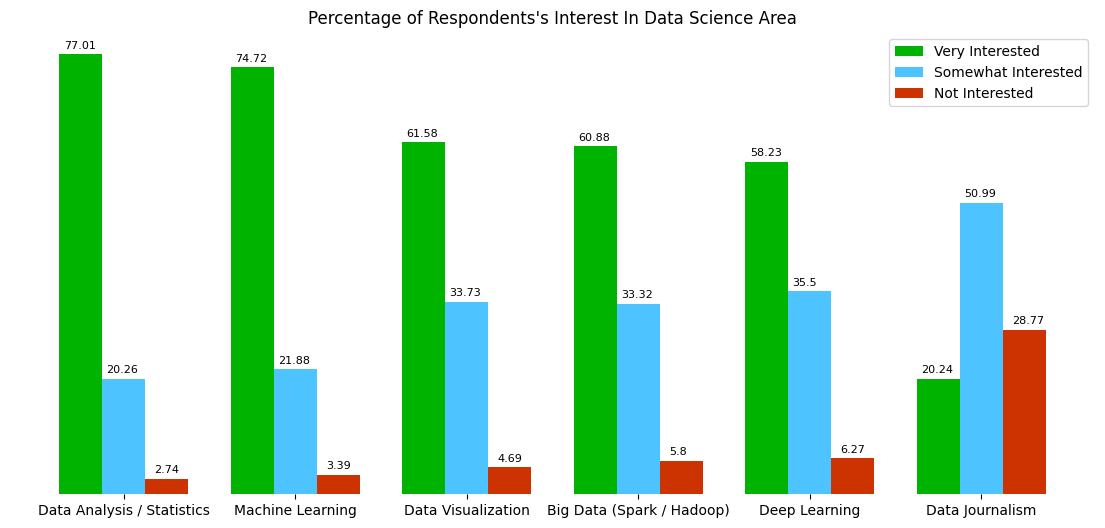

In [56]:
x_pos = [i for i in range(len(df_new['Data Area']))]
bar_width = 0.25
fig, ax = plt.subplots(figsize = (14,6))

ax.bar(x_pos, df_new['Very interested'], bar_width, color='#00b300', label='Very Interested')
for i, v in enumerate(df_new['Very interested']):
    ax.text(i - 0.1, v + 1, str(v), color='black', fontsize=8)

ax.bar([i + bar_width for i in x_pos], df_new['Somewhat interested'], bar_width, color='#4dc3ff', label='Somewhat Interested')
for i, v in enumerate(df_new['Somewhat interested']):
    ax.text(i + bar_width -0.1, v + 1, str(v), color='black', fontsize=8)

ax.bar([i + 2*bar_width for i in x_pos], df_new['Not interested'], bar_width, color='#cc3300', label='Not Interested')
for i, v in enumerate(df_new['Not interested']):
    ax.text(i + 2*bar_width - 0.07, v + 1, str(v), color='black', fontsize=8)

# Remove the x-axis only
plt.gca().yaxis.set_visible(False)

# remove border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

ax.set_title("Percentage of Respondents's Interest In Data Science Area")   
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(df_new['Data Area'])
ax.legend()

plt.show()

# **Seaborn**

# Task 1

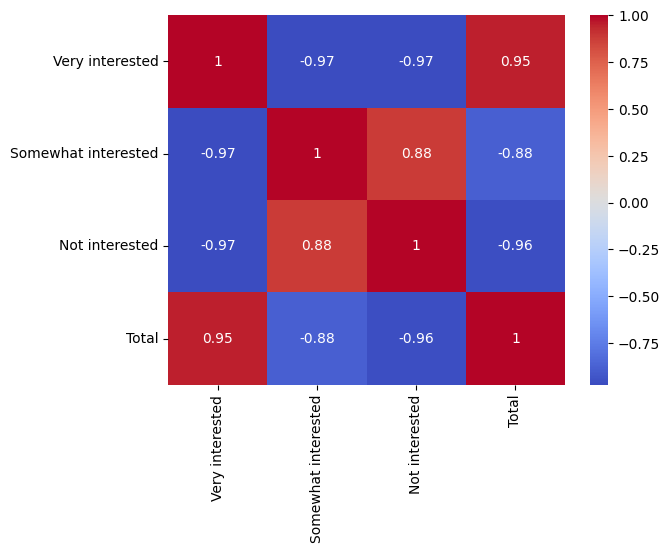

In [61]:
import warnings
warnings.filterwarnings("ignore")
corr = df_new.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

# Task 2

**Method 1: using subplots with 2 charts**

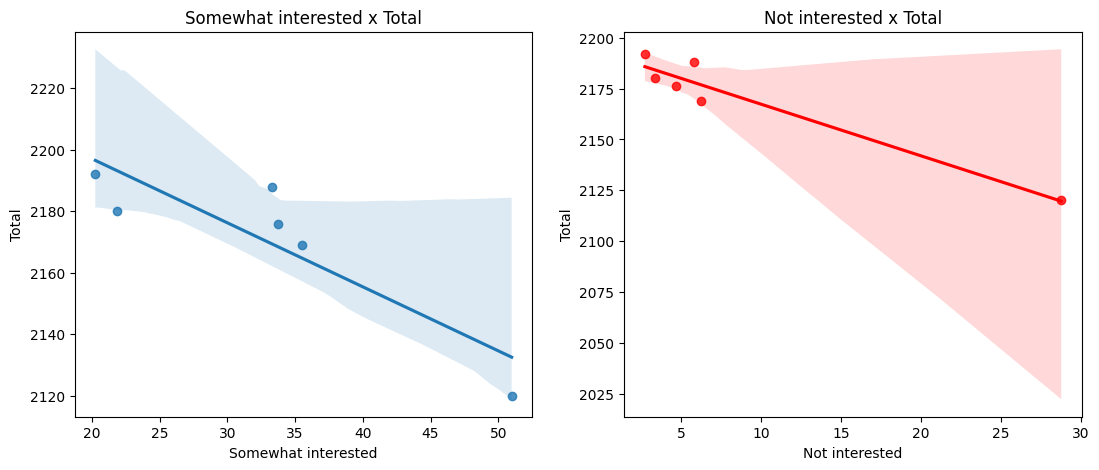

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Regplot for 'Somewhat interested'
sns.regplot(data=df_new, x="Somewhat interested", y="Total", ci=95, ax=ax1)
ax1.set(xlabel='Somewhat interested', ylabel='Total') 
ax1.set_title("Somewhat interested x Total")

# Regplot for 'Not interested'
sns.regplot(data=df_new, x="Not interested", y="Total", ci=95, ax=ax2, color = "red")
ax2.set(xlabel='Not interested', ylabel='Total')
ax2.set_title("Not interested x Total")

plt.show()